<a href="https://colab.research.google.com/github/brinda-lax/Elite-intership/blob/main/project_4_sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df=pd.read_csv('Yelp Restaurant Reviews.csv')

In [ ]:
df.head()

,Yelp URL,Rating,Date,Review Text
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...


In [ ]:
df.columns

Index(['Yelp URL', 'Rating', 'Date', 'Review Text'], dtype='object')

In [ ]:
df = df[['Review Text', 'Rating']]  # Keep only needed columns
df.head()

,Review Text,Rating
0,All I can say is they have very good ice cream...,5
1,Nice little local place for ice cream.My favor...,4
2,A delicious treat on a hot day! Staff was very...,5
3,This was great service and a fun crew! I got t...,4
4,This is one of my favorite places to get ice c...,5


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    tokens = text.split()  # Less precise but works without punkt

    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['cleaned_text'] = df['Review Text'].apply(preprocess)


In [ ]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment_score'] = df['cleaned_text'].apply(get_sentiment)

df['sentiment'] = df['sentiment_score'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5624\225404670.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Set2')


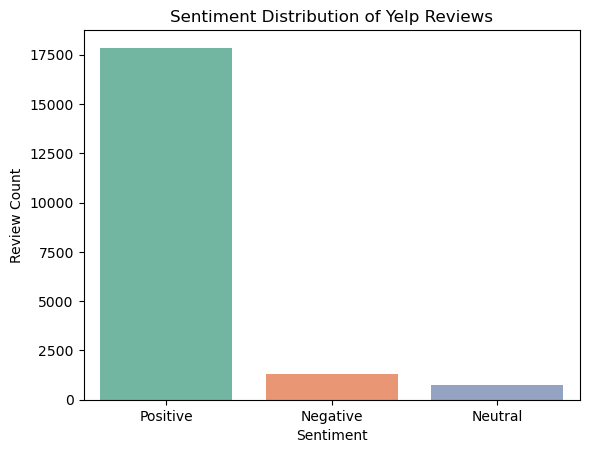

In [ ]:
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title('Sentiment Distribution of Yelp Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Review Count')
plt.show()


In [ ]:
!pip install wordcloud


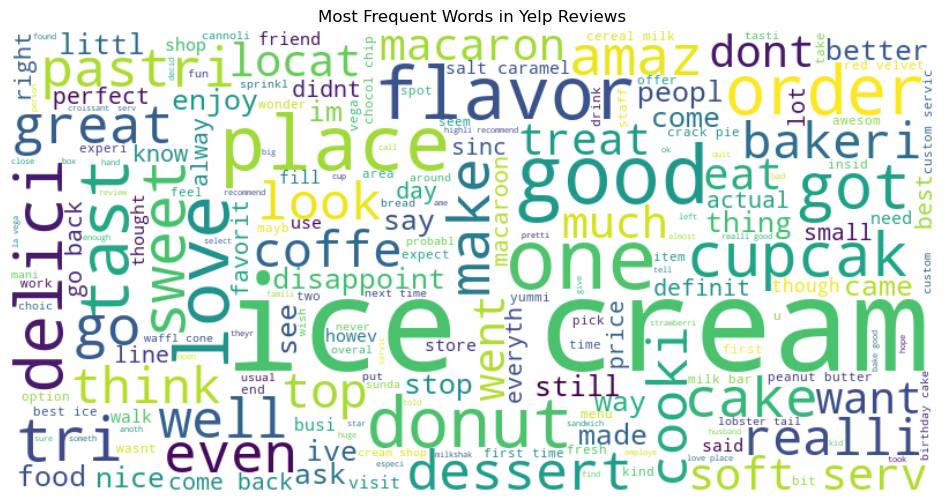

In [ ]:
text_all = " ".join(df['cleaned_text'].dropna())
wc = WordCloud(width=800, height=400, background_color='white').generate(text_all)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Yelp Reviews')
plt.show()


In [ ]:
# Most positive review
print("Most Positive Review:\n", df.loc[df['sentiment_score'].idxmax(), 'Review Text'])

# Most negative review
print("\nMost Negative Review:\n", df.loc[df['sentiment_score'].idxmin(), 'Review Text'])





Most Positive Review:
 My brother took us here & I gotta say..... one of the best boba places here in AZ. There's one closer to where we're staying for our summer vacay, but we drove out a little just for this place!

Most Negative Review:
 I really wanted to like this place, being a fan of the Cake Boss show. The pastries in the display looked delicious. But the looks were deceiving. The pastries were dry and just so-so. Even the famous cannolis were disappointing. Worst of all, they neglected to put the almond croissant I had ordered and paid for in the box they handed me. By the time I realized this, I was already on my way out of Vegas! Mediocre pastries at an expensive price. No wonder there were no other customers when I arrived at the store.

Average Sentiment by Star Rating:
 Rating
1    0.075253
2    0.166760
3    0.231743
4    0.284211
5    0.328526
Name: sentiment_score, dtype: float64


  # Sentiment vs. Rating Mismatch Detection

In [ ]:
mismatch = df[
    ((df['sentiment'] == 'Positive') & (df['Rating'] <= 2)) |
    ((df['sentiment'] == 'Negative') & (df['Rating'] >= 4))
]

In [ ]:

print(f"Number of mismatched reviews: {mismatch.shape[0]}")
mismatch[['Review Text', 'Rating', 'sentiment', 'sentiment_score']].head()

Number of mismatched reviews: 2426


,Review Text,Rating,sentiment,sentiment_score
6,The soft-serve is way too sweet and has a stra...,1,Positive,0.425000
9,Went here for the 1st time tonight. I ordered ...,2,Positive,0.069388
10,Our bike club comes here often year round for ...,4,Negative,-0.200000
22,Ice cream is good but the service could be imp...,2,Positive,0.030506
30,I used to looove this place (hence my previous...,2,Positive,0.140000


 Insight: These could indicate sarcasm, complex reviews, or customers unhappy despite a positive tone.

# Sentiment by Review Length

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5624\3943787589.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='review_length', data=df, palette='Set2')


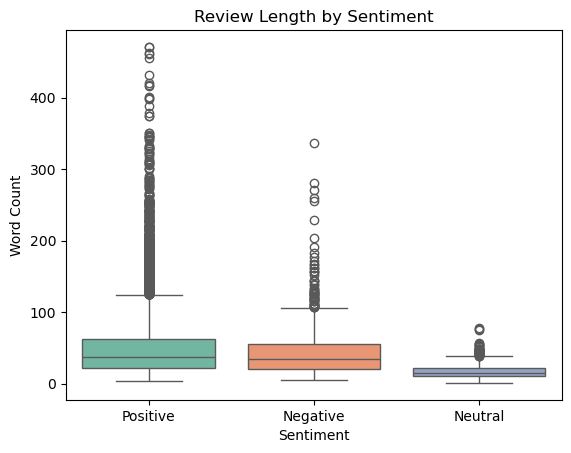

In [ ]:
df['review_length'] = df['cleaned_text'].apply(lambda x: len(x.split()))

sns.boxplot(x='sentiment', y='review_length', data=df, palette='Set2')
plt.title('Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Word Count')
plt.show()


# Sentiment by Rating

In [ ]:
avg_sentiment_by_rating = df.groupby('Rating')['sentiment_score'].mean()
print("\nAverage Sentiment by Star Rating:\n", avg_sentiment_by_rating)


Average Sentiment by Star Rating:
 Rating
1    0.075253
2    0.166760
3    0.231743
4    0.284211
5    0.328526
Name: sentiment_score, dtype: float64


# Top Positive / Negative Words

In [ ]:
from collections import Counter

def get_top_words(df, sentiment_label, n=10):
    words = " ".join(df[df['sentiment'] == sentiment_label]['cleaned_text']).split()
    return Counter(words).most_common(n)

print("Top Positive Words:", get_top_words(df, 'Positive'))
print("Top Negative Words:", get_top_words(df, 'Negative'))


Top Positive Words: [('cream', 16869), ('ice', 15751), ('place', 9706), ('good', 9303), ('flavor', 8699), ('tri', 7859), ('like', 7138), ('get', 6647), ('one', 6512), ('love', 6089)]
Top Negative Words: [('cream', 701), ('ice', 673), ('place', 503), ('get', 500), ('order', 496), ('like', 490), ('time', 461), ('go', 455), ('one', 451), ('tri', 421)]
